# Outliers
- An outlier is a data point in a data set that is sistant from all other observations, which is significanly different from the remaining data.
- A data point that lies outside the overall distrbution of the dataset.

### What are the impacts of having outliers in a dataset?
1. It causes various problems during our statistical analysis(it may cause a significant impact on the mean and the standard deviation) statistics such as the mean and variance are very susceptible to outliers.
2. In addition, some machine learing models are sensitive to outliers which may decrease their performance. Thus, depending on which algorithm we wish to train, we often remove outliers from our variables.

### Reasons for Outliers in data. 
1. Data Entry errors (ex: 100000, inplace of 1000)
2. Measurement Error (Ex meters vs km, lb vs kg)
3. Instrumental Errors (Faulty sensors).

## Types of outliers. 
1. Univariate outliers --> Indentifing outliers for single variable (Identified using box plot).
2. Bivariate outliers --> Indentified as outlier by analyzing 2 variables at a time (Identified using scatter plot).

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("claimants sample.csv")
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,NaN,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


In [29]:
df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    2
SEATBELT    0
CLMAGE      1
LOSS        1
ATTORNEY    0
dtype: int64

### Various ways of finding the outliers. 

#### Detection of outliers (based on Box plot)

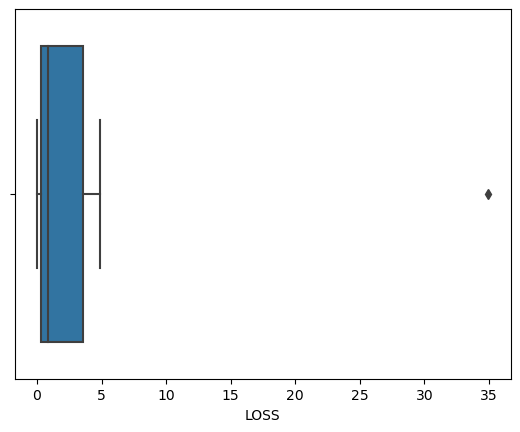

In [30]:
sns.boxplot(x=df["LOSS"])
plt.show()

#### Detecting of outliers (Based on IQR)
- Calculate first(q1) and third quartile(q3)
- Find interquartile range(q3-q10
- Fid lower bound q1 1.5 and find upper bound q3 1.5

In [31]:
Q1 = df["LOSS"].quantile(0.25)
Q3 = df["LOSS"].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

0.33 3.538 3.2079999999999997


In [32]:
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)

lower_limit, upper_limit

(-4.481999999999999, 8.35)

In [33]:
df[df["LOSS"] > upper_limit]

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.94,0


In [35]:
df[df["LOSS"] < lower_limit]

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY


In [36]:
df["LOSS"].fillna(df["LOSS"].median(),inplace = True)
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,34.940,0
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,0.874,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


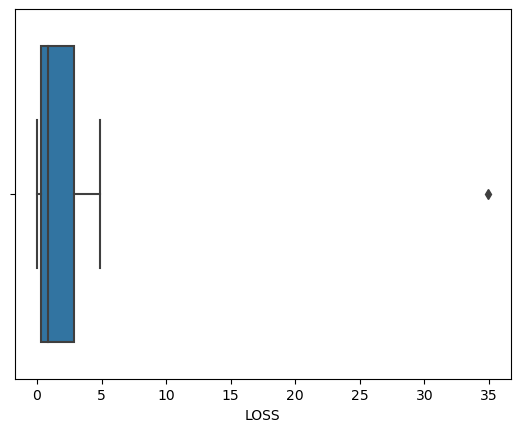

In [37]:
sns.boxplot(x = df["LOSS"])
plt.show()

## Dealing with Outliers (3 'R' Technique)

#### 1. Remove(Trimming: remove the outliers from out data set) 

In [38]:
df_trimmed = df[(df["LOSS"] > lower_limit) & (df["LOSS"] < upper_limit)]
df_trimmed

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
1,3,1,0.0,0,18.0,0.891,1
2,66,0,1.0,0,5.0,0.330,1
3,70,1,1.0,1,31.0,0.037,0
4,96,0,1.0,0,30.0,0.874,1
5,97,1,1.0,0,35.0,0.309,0
6,10,0,NaN,0,9.0,3.538,0
7,36,1,NaN,0,34.0,4.881,0
8,51,1,1.0,0,60.0,0.874,1
9,55,1,1.0,0,NaN,0.350,1


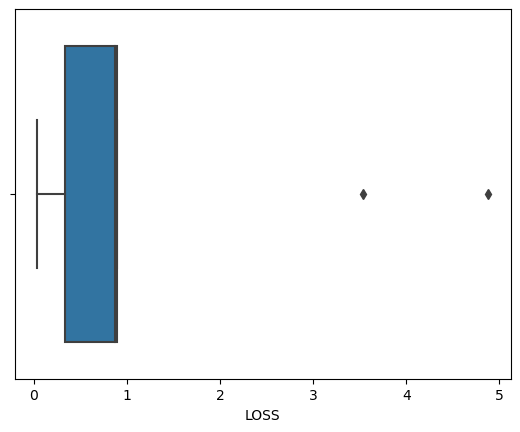

In [39]:
sns.boxplot(x = df_trimmed["LOSS"])
plt.show()

- We can still see some outliers.
- When we remove data points from our dataset, all the parameters of the distribution are recalculated(Mean, quartiles, range)
- This is the problem with dealing with outliers in this method.

### 2.  Replace the Outliers 

#### 1. Rectify or Replace -->(data entry error) --> As and confirm it from the data Engineering team. 
#### 2. Replace with upper limit & lower limit (Calculated based on IQR). 

In [22]:
#pip install feature_engine (Another module). make sure to add ! infront of pip since shell command need to execute from here. 
!pip install feature_engine

In [40]:
from feature_engine.outliers import Winsorizer

In [45]:
win = Winsorizer(capping_method = "iqr", tail = "both", fold = 1.5)

df["LOSS"] = win.fit_transform(df[["LOSS"]])

df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0,1.0,0,50.0,6.688125,0
1,3,1,0.0,0,18.0,0.891000,1
2,66,0,1.0,0,5.0,0.330000,1
3,70,1,1.0,1,31.0,0.037000,0
4,96,0,1.0,0,30.0,0.874000,1
5,97,1,1.0,0,35.0,0.309000,0
6,10,0,NaN,0,9.0,3.538000,0
7,36,1,NaN,0,34.0,4.881000,0
8,51,1,1.0,0,60.0,0.874000,1
9,55,1,1.0,0,NaN,0.350000,1


In [46]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'LOSS': -3.4768749999999997} {'LOSS': 6.688124999999999}


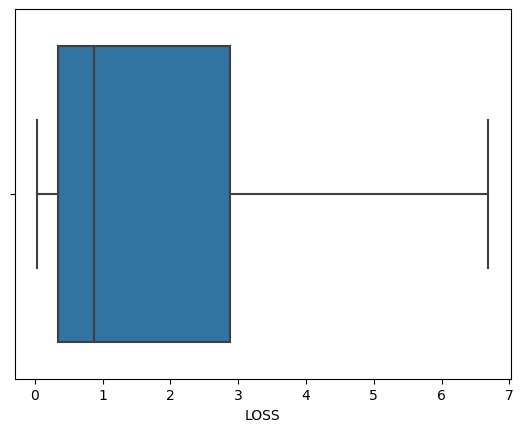

In [48]:
sns.boxplot(x=df["LOSS"])
plt.show()

#### 2.b Replace Arbitrary outlier Capper(the minimum and maximum values by a value determined by the user)
- We get teh min and max values based on domain expert.

In [53]:
from feature_engine.outliers import ArbitraryOutlierCapper

capper = ArbitraryOutlierCapper(max_capping_dict = {"LOSS":6},min_capping_dict = {"LOSS":0.03})

df_c = capper.fit_transform(df[["LOSS"]])

df_c

,LOSS
0,6.000
1,0.891
2,0.330
3,0.037
4,0.874
5,0.309
6,3.538
7,4.881
8,0.874
9,0.350


### 3. Retain (consider for analysis) --> Treat them seprately.

- Make different data set for those specific outliers
- Ex:: Amazone will have more sales on blackfriday. Its not mistake but this occure ever year. So instead of removing it we can either seprate it or do different calculation for data set with that value. 